# Write-up Section
# Question 1

Suppose we have samples from a bivariant Gaussian with mean 
$\begin{bmatrix} 2 \\ 3 \end{bmatrix}$ and covariant $\begin{bmatrix} 2 & 2 \\ 2 & 3 \end{bmatrix}$, calculate the principle components of the data. The plot of the data is shown below.

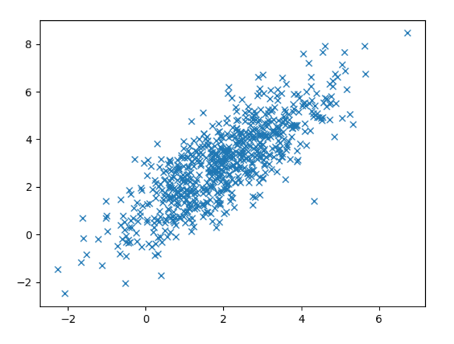

ANSWER:

The bivariant gaussian mean vector is an important component for centering the data but is not directly involved in the computation of the principle components. 

1. we need to center the data using the mean vector. This is completed by subtracting each variable in the datset by the mean. 
2. post centering the data, we calculate the covariance matrix. This matrix is interpereted as the relationship between each variable according to their variance.
3. compute Eigen Vectors through Eigen Decomposition. The Eigan Vectors represent the direction of maximum variance and the eigan values represent the magnitude of variance in that direction.

In [1]:
# calculating PCA given covariance matrix
import numpy as np

# covariance matrix
cov_m = np.array([[2, 2], [2, 3]])

# eigen values and eigen vectors
eigenvals, eigenvect = np.linalg.eig(cov_m)

print(f'Eigen values: {eigenvals}\n')

print(f'Eigen Vectors (Principal Components): {eigenvect}')

Eigen values: [0.43844719 4.56155281]

Eigen Vectors (Principal Components): [[-0.78820544 -0.61541221]
 [ 0.61541221 -0.78820544]]


# Question 2

What is the variance explained by the first component calculated in question 1

ANSWER:

The variance explained by the first principle component is always the largest Eigen value calculated from the covariance matrix. In this case - it is $max(eigenvals) = 4.56$. Because this is the highest, it is the most important, in terms of weight, that explains the spread of the data. The most total variance is captured by this component.

# Question 3

What is the variance explained by the first component calculated in question 1

ANSWER:

The variance explained by the second principle component is always the second to the largest Eigen value calculated from the covariance matrix. In this case, because it is only two values - it is $min(eigenvals) = 0.44$. This helps us to understand more of the structure and spread of the data but does not hold as much significance than the first. 

# Complete the Code Section
# Question 4 
Fill out the code cells.

#### Dimensionality Reduction 

We've covered feature selection and feature extraction algorithms in lecture, reducing the redundent features and keep only meaningful features can reduce overfitting.  In this assignment you will implement several common algorithms to tackle this problem.

## Feature Selection

## L1 & L2 Regularization

Recall from Unit 3, we've implemented Logistic Regression model by using sklearn LogisticRegression module, there is a hyperparameter C you need to specify when you define the LogisticRegression. This C is regularization strength and it controls how much you want to regularize the coefficients of logistic regression.  Smaller values of C specify stronger regularization.

The regularization is actually a way to select meaningful features. In the following code cells we will look at L1 and L2 regularization and do feature selection by using regularization.

L1 regularization : 

\begin{equation}
L1 :  \sum_{j=1}^m \lvert w_{j} \lvert 
\end{equation}

L2 regularization : 

\begin{equation}
L1 :  \sum_{j=1}^m w_{j}^2 
\end{equation}

In [1]:
import pandas as pd
import numpy as np
import ssl; ssl._create_default_https_context = ssl._create_stdlib_context

# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_30889/1227789369.py:6: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import LooseVersion as Version


In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Split the data into train and test set

In [3]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8, stratify = y)

## Scale the feature

In [4]:
from sklearn.preprocessing import StandardScaler

# TODO :: It's your time to standardlize the training set and test set. (Hint : Recall from the frist problem in assignment4)
# Three lines of code expected, name standardlized training set X_train_std and standardlized test set X_test_std
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## Define L1 regularization

In [8]:
from sklearn.linear_model import LogisticRegression

# TODO :: it's your turn to define sklearn LogisticRegression with l1 regularization with C = 0.1, fit the model on 
# X_train_std, and print the accuracy on training set and test set, expect 4 lines of code; you can refer to the 
# sklearn LogisticRegression page : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lr_l1 = LogisticRegression(C=0.1, penalty='l1', solver='liblinear').fit(X_train_std, y_train)
train_accuracy = lr_l1.score(X_train_std, y_train)
test_accuracy = lr_l1.score(X_test_std, y_test)
print(f'training data accuracy: {train_accuracy}\ntesting data accuracy: {test_accuracy}')

training data accuracy: 0.9919354838709677
testing data accuracy: 0.9814814814814815


## Define L2 regularization

In [9]:
# TODO :: define L2 regularization with C = 0.1, fit the model on X_train_std, and print the accuracy on training 
# set and test set, expect 4 lines of code
lr_l2 = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs').fit(X_train_std, y_train)
train_accuracy = lr_l2.score(X_train_std, y_train)
test_accuracy = lr_l2.score(X_test_std, y_test)
print(f'training data accuracy: {train_accuracy}\ntesting data accuracy: {test_accuracy}')

training data accuracy: 0.9919354838709677
testing data accuracy: 1.0


In [10]:
print("coefficients for l1 : {}".format(lr_l1.coef_))
print("coefficients for l2 : {}".format(lr_l2.coef_))

print("intercept for l1 : {}".format(lr_l1.intercept_))
print("intercept for l2 : {}".format(lr_l2.intercept_))

coefficients for l1 : [[ 3.13352317e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  6.59924467e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.39797263e+00]
 [-8.44918777e-01 -4.80821432e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -7.76919005e-01  7.35480995e-02  0.00000000e+00
  -4.36642789e-01]
 [ 0.00000000e+00  1.24701003e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -6.28961404e-01  0.00000000e+00
   0.00000000e+00  4.88632243e-01 -5.02020940e-01 -4.60700154e-01
   0.00000000e+00]]
coefficients for l2 : [[ 0.4296037   0.01093473  0.22386139 -0.33538117  0.07293714  0.24151872
   0.32671932 -0.11521945  0.06210735  0.05757315  0.15520909  0.29621362
   0.52671645]
 [-0.5557195  -0.20608288 -0.30418513  0.22105452 -0.13108107 -0.03050785
   0.09796842  0.03731307  0.14921795 -0.44006357  0.27821485  0.11

## Question 1 

What is the difference between the value of the coefficients of L1 versus L2? Which one do you think is better?

ANSWER:

L1 has eliminated the importance of some of the features, as it's meant to do, in order to consider the more attributable predictors to the model. L2, however, has reduced the weight of the features which don't hold as much feature importance in the model. Although L2 shows a perfect performance/accuracy this can be a sign of overfitting. However, L1, according to the intercepts, does make a lot of assumptions about the data considering that all of the intercept values are negative which could explain the 0.98 accuracy vs the 1.0 accuracy with L2. Although it is hard to say considering that is not very much data to train on, I would be more inclined to choose model L1 because, this context, it does not overfit the data and truly takes in the weight of the features that have the most impact.


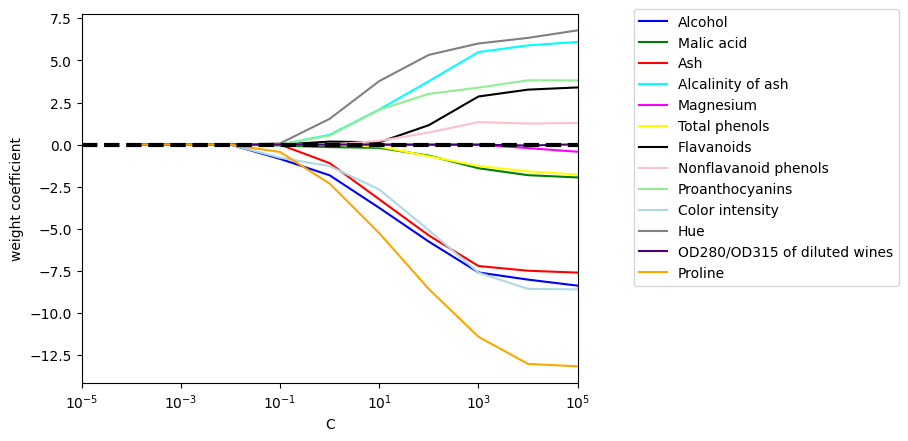

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0, solver = 'liblinear', multi_class='auto')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

plt.show()


## Question 2

What do you observe from the plot above?

ANSWER:

The C (Regularization) value incrases, we can see a greater separation between the positive and negative coefficients of each feature. As the regularization increases the more positive or more negative our coefficients data becomes. 


## Sequential feature selection algorithms

In this section you will implement sequential backward selection algorithm from scratch.  Backward selection and forward selection are both greedy algorithms to select features making locally optimal choices at each stage of a combinatorial search problem.  They generally yield a suboptimal solution to the problem. Here's the psuedocode.

1. Intialize the algorithm with k = d, where d is the dimensionality of the full feature space x.

2. Determine the feature x that causes the least performance loss.

3. Remove the feature x from the feature set

4. Terminate if k equals the number of desired features, if not go to step 2.

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def sbs(X, y, desired_features):
    # Initialize
    features = list(range(X.shape[1]))
    current_features = features.copy()
    k = len(current_features)
    
    while k > desired_features:
        scores = []
        # Test removing each feature
        for feature in current_features:
            temp_features = current_features.copy()
            temp_features.remove(feature)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8, stratify = y)
            scaler = StandardScaler().fit(X_train)
            X_train_std = scaler.transform(X_train)
            X_test_std = scaler.transform(X_test)
            # Train the model
            model = LogisticRegression().fit(X_train_std, y_train)
            # Evaluate the model
            y_pred = model.predict(X_test_std)
            scores.append(accuracy_score(y_test, y_pred))
        
        # Remove the feature with the least impact
        worst_feature = current_features[np.argmin(scores)]
        current_features.remove(worst_feature)
        k -= 1

    return current_features


# desired_features = the number of features you want to keep
selected_features = sbs(X, y, 5)
print("Selected features:", selected_features)

Selected features: [8, 9, 10, 11, 12]


In [28]:
from sklearn.metrics import accuracy_score

def calc_score(estimator, X_train, y_train, X_test, y_test, indices):
    estimator.fit(X_train[:, indices], y_train)
    y_pred = estimator.predict(X_test[:, indices])
    score = accuracy_score(y_test, y_pred)
    return score

In [29]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone
from itertools import combinations

dim = X_train_std.shape[1]

indices = tuple(range(dim))
final_subsets = [indices]
knn = KNeighborsClassifier(n_neighbors=5)

score = calc_score(knn, X_train_std, y_train, X_test_std, y_test, indices)
final_scores = [score]
k_features = 1

while dim > k_features:
    scores = []
    subsets = []

    for p in combinations(indices, r=dim - 1):
        score = calc_score(knn, X_train_std, y_train, X_test_std, y_test, p)
        scores.append(score)
        subsets.append(p)

    best = np.argmax(scores)
    indices = subsets[best]
    final_subsets.append(indices)
    dim -= 1
    final_scores.append(scores[best])

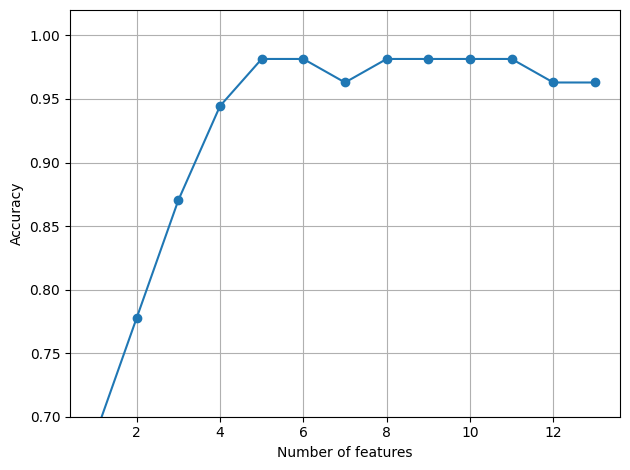

In [30]:
k_feat = [len(k) for k in final_subsets]
plt.plot(k_feat, final_scores, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

## Question 3

Form the plot above, can you make the decision what is the best number of feature to keep for this dataset?

ANSWER:

5 features is where the accuracy of the dataset finally plateau's


## Assessing feature importance with Random Forests

Decision tree models are invariant to the scale of the feature value because they  will iterate all the feature space to find the best way to split each node. Therefore standardlization is not needed for decision tree models. A decision tree can measure the feature importance which we can use as a reference to reduce unimportant feature.

In [32]:
from sklearn.ensemble import RandomForestClassifier


feat_labels = df_wine.columns[1:]

# TODO :: Define RandomForestClassifier with n_estimators equals to 500 and random_state equals to 1, fit it on original
# training set, expect 2 lines of code
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train_std, y_train)


RandomForestClassifier(n_estimators=500, random_state=1)

 1) Proline                        0.175231
 2) Flavanoids                     0.148403
 3) Color intensity                0.140723
 4) Alcohol                        0.136390
 5) OD280/OD315 of diluted wines   0.112770
 6) Hue                            0.096366
 7) Total phenols                  0.051925
 8) Malic acid                     0.033395
 9) Magnesium                      0.032610
10) Alcalinity of ash              0.027765
11) Proanthocyanins                0.023955
12) Ash                            0.012017
13) Nonflavanoid phenols           0.008450


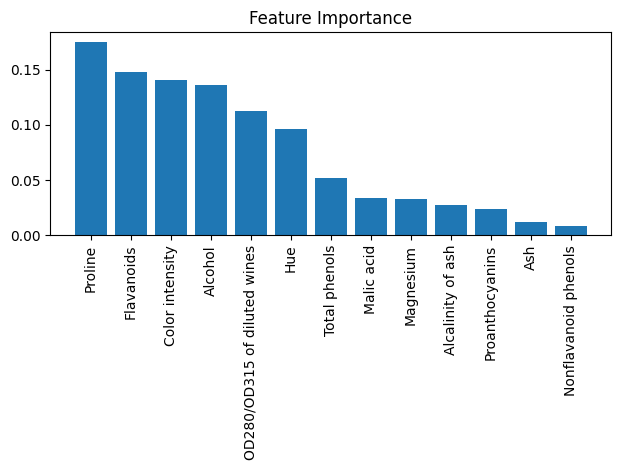

In [33]:
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

## Question 4

What feature and how many features do you want to keep based on the feature importance of decision tree model?

ANSWER:

 1) Proline                        0.175231
 2) Flavanoids                     0.148403
 3) Color intensity                0.140723
 4) Alcohol                        0.136390
 5) OD280/OD315 of diluted wines   0.112770
 6) Hue                            0.096366

 These 6 features seem to hold the most importance up until Total Phenols where we see a more signifiacnt drop in feature importance.


## Feature Extraction

In the above section, you implemented several feature selection algorihtms. In feature extraction, we derive information from the feature set to construct a new feature subspace. 

## Principle Component Analysis (PCA)

PCA is an unsupervised algorithm that is used for feature extraction in high-dimensional and correlated data. It transforms features into orthogonal component axes of maximum variance in a dataset. You will use pca to process data before training.

In [41]:
import numpy as np

cov_mat = np.cov(X_train_std.T) # TODO :: compute covariance matrix for the X_train_std (hint: use np.cov())
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) # TODO :: calculate eigendecomposition


## Reduce feature to 2D

In [42]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13014564  0.47849345]
 [ 0.26244395  0.25298425]
 [-0.0330627   0.29006642]
 [ 0.2245178  -0.02757049]
 [-0.12094643  0.32107576]
 [-0.40080673  0.06461311]
 [-0.42571533  0.01530453]
 [ 0.29501629  0.01702477]
 [-0.30188219  0.06389967]
 [ 0.10179198  0.52646532]
 [-0.29709011 -0.27350911]
 [-0.38987878 -0.16249042]
 [-0.27817117  0.36317556]]


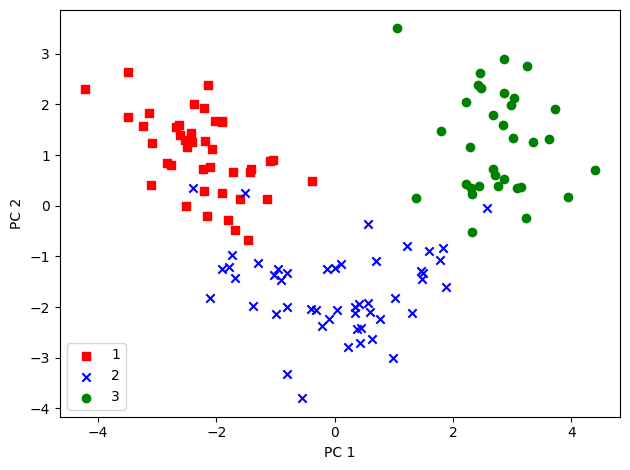

In [43]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

In [44]:
from sklearn.decomposition import PCA

# TODO :: use sklearn pca to leverage this process, and fit it on X_train_std, and call explained_variance_ratio_ on 
# pca object you defined, expect 3 lines of code
pca = PCA()
pca.fit(X_train_std)
pca.explained_variance_ratio_


array([0.34868659, 0.20128909, 0.11680705, 0.07524985, 0.06592192,
       0.04659052, 0.04093261, 0.02785345, 0.02270837, 0.01897402,
       0.014609  , 0.01182244, 0.00855506])

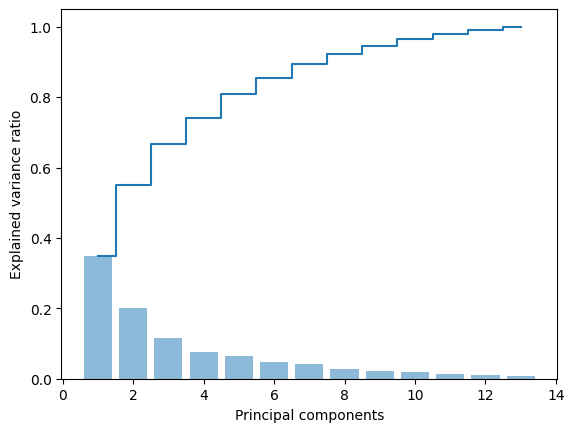

In [45]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [46]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [47]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [48]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'lbfgs', multi_class = "auto")
lr = lr.fit(X_train_pca, y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_30889/442015021.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequenc

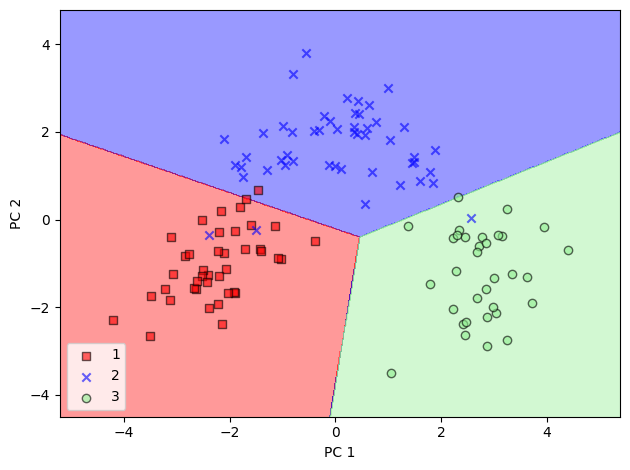

In [49]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_30889/442015021.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequenc

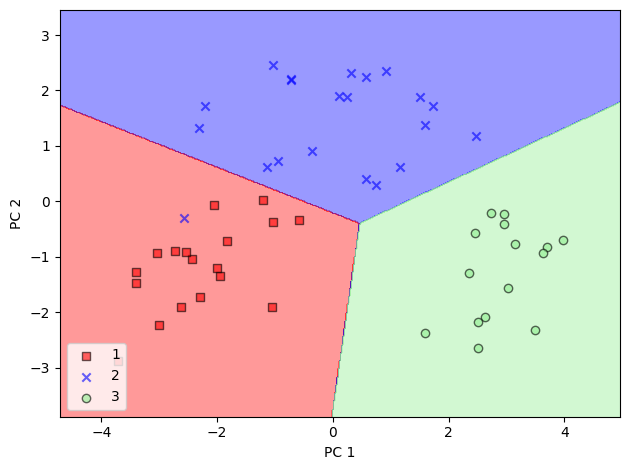

In [50]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca4.png', dpi=300)
plt.show()

## LDA 

## Computing the scatter matrices

In [51]:
np.set_printoptions(4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9228 -0.316   0.3847 -0.7173  0.4608  0.8714  0.9517 -0.5465  0.5079
  0.2031  0.4787  0.7461  1.1824]

MV 2: [-0.912  -0.3896 -0.4162  0.2438 -0.4128 -0.0584  0.0366  0.0112  0.0559
 -0.8441  0.4118  0.2587 -0.7408]

MV 3: [ 0.2353  0.9829  0.1526  0.5218  0.0529 -0.9942 -1.2378  0.6621 -0.7158
  1.0266 -1.2186 -1.3189 -0.3465]



## Compute the within-class scatter matrix:

In [52]:
d = 13
S_W = np.zeros((d, d))
for index, mean in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d, d)) # scatter matrix for each class
    for row in X_train_std[y_train == index]:
        row, mean = row.reshape((d, 1)), mean.reshape((d, 1)) # make column vectors
        class_scatter += (row - mean).dot((row-mean).T)
    S_W += class_scatter  # sum class scatter matrices
print("Within-class scatter matrix: %sx%s" % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [53]:
print('Class label distribution: %s' 
      % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


## Normalize the within-class scatter matrix:

Since the class label is not distributed evenly, we need to normalize the with-in class scatter matrix


In [54]:
for index in range(1,4):
    class_scatter = np.cov(X_train_std[y_train == index].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


## Compute the between-class scatter matrix:

In [55]:
mean_overall = np.mean(X_train_std, axis = 0)
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))
    

Between-class scatter matrix: 13x13


## Selecting linear discriminants for the new feature subspace

Solve the generalized eigenvalue problem for the matrix $S_W^{-1}S_B$:

In [56]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B)) # TODO :: calculate the eigenvalue (hint : use np.linalg.eig and np.linalg.inv)


Sort eigenvectors in decreasing order of the eigenvalues:

In [57]:

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

9.2497769827749
4.038069966765536
8.881784197001252e-16
6.330823328658424e-16
4.472486749991962e-16
4.131641196586949e-16
3.9834868161324194e-16
3.9834868161324194e-16
2.7796028984304023e-16
2.7796028984304023e-16
1.6177919082929006e-16
8.137912960869329e-17
4.406679879918925e-17


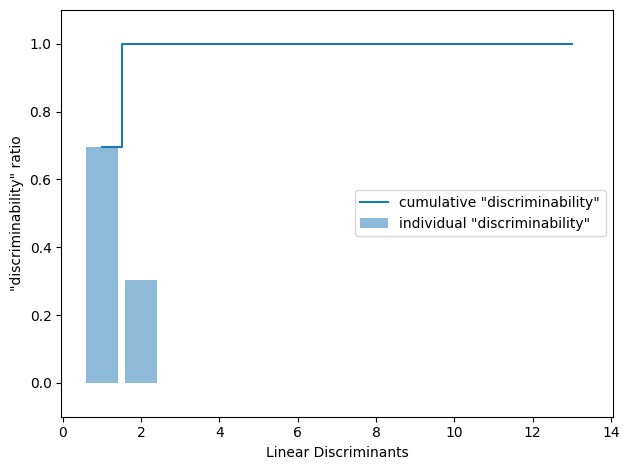

In [58]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/lda1.png', dpi=300)
plt.show()

In [59]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.2572 -0.4632]
 [-0.0577 -0.1797]
 [ 0.0521 -0.3757]
 [-0.2063  0.255 ]
 [ 0.0195 -0.0033]
 [-0.0626 -0.0895]
 [ 0.6631  0.3576]
 [ 0.086   0.0887]
 [-0.0228  0.108 ]
 [-0.4103 -0.2776]
 [ 0.1121  0.2363]
 [ 0.2732  0.0978]
 [ 0.4217 -0.499 ]]


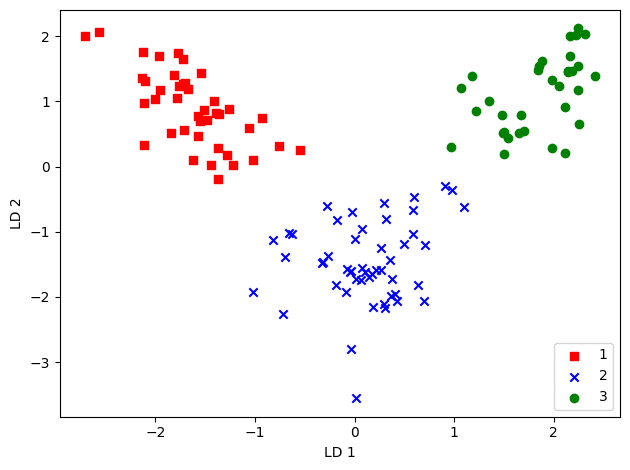

In [60]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0] * (-1),
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('./figures/lda2.png', dpi=300)
plt.show()

## Question 5

Compare LDA to PCA algorithm. Which one works better for this problem?

ANSWER:

LDA seems to be the better choce. We can see that the separation between the data points is much more distinct compared to PCA. Although LDA might cause overfitting, PCA shows to be not as strong of a separater between the feature space.



## LDA via scikit-learn


In [61]:
if Version(sklearn_version) < '0.18':
    from sklearn.lda import LDA
else:
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_30889/442015021.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequenc

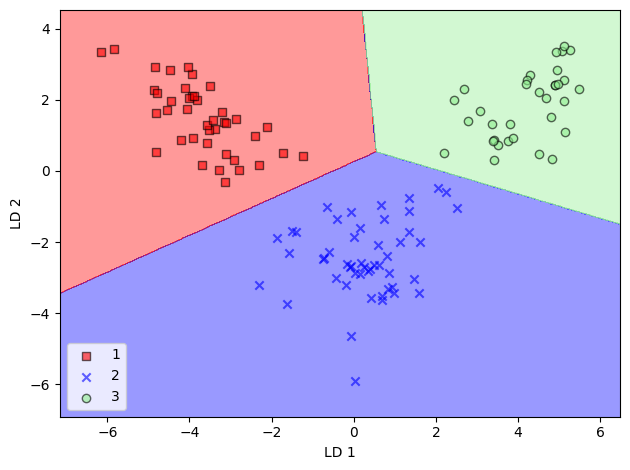

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/lda3.png', dpi=300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_30889/442015021.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequenc

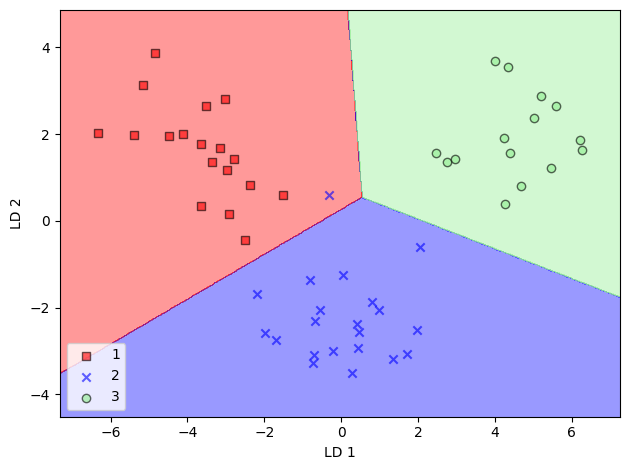

In [63]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/lda4.png', dpi=300)
plt.show()